In [47]:
df <- read.csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/swr_df.csv')
summary(df)

df_ripple_rate <- read.csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/df_ripple_rate.csv')
summary(df_ripple_rate)

       X           Unnamed..0    ripple_number    start_time    
 Min.   :    0   Min.   :    0   Min.   :   0   Min.   :   0.0  
 1st Qu.: 4386   1st Qu.: 4432   1st Qu.: 179   1st Qu.: 717.7  
 Median : 8772   Median : 8897   Median : 405   Median :1747.9  
 Mean   : 8772   Mean   : 8891   Mean   : 584   Mean   :1779.6  
 3rd Qu.:13158   3rd Qu.:13344   3rd Qu.: 874   3rd Qu.:2597.7  
 Max.   :17544   Max.   :17822   Max.   :3665   Max.   :6172.0  
                                                                
    end_time        ripple_duration     max_emg          peak_time       
 Min.   :   0.239   Min.   :0.0248   Min.   :-0.0709   Min.   :   0.002  
 1st Qu.: 717.786   1st Qu.:0.0720   1st Qu.: 0.3016   1st Qu.: 717.737  
 Median :1747.918   Median :0.1040   Median : 0.4030   Median :1747.898  
 Mean   :1779.701   Mean   :0.1230   Mean   : 0.4449   Mean   :1779.642  
 3rd Qu.:2597.737   3rd Qu.:0.1520   3rd Qu.: 0.5471   3rd Qu.:2597.722  
 Max.   :6172.226   Max.   :0.9864  

       X         Unnamed..0   ripple_rate                          session   
 Min.   :  0   Min.   :  0   Min.   :0.000521   LEM3116_S20180715121821:  1  
 1st Qu.: 47   1st Qu.: 47   1st Qu.:0.010138   LEM3116_S20180715160836:  1  
 Median : 94   Median : 94   Median :0.035276   LEM3116_S20180716115155:  1  
 Mean   : 94   Mean   : 94   Mean   :0.075463   LEM3116_S20180716174306:  1  
 3rd Qu.:141   3rd Qu.:141   3rd Qu.:0.082044   LEM3116_S20180717110938:  1  
 Max.   :188   Max.   :188   Max.   :0.481211   LEM3116_S20180717203042:  1  
                                                (Other)                :183  
     group      area    
 control: 80   ca1: 81  
 pae    :109   ca3:108  
                        
                        
                        
                        
                        

In [22]:
set_size <- function(width, fraction, subplots) {
#     """Set figure dimensions to avoid scaling in LaTeX.
#     Parameters
#     ----------
#     width: float or string
#             Document width in points, or string of predined document type
#     fraction: float, optional
#             Fraction of the width which you wish the figure to occupy
#     subplots: array-like, optional
#             The number of rows and columns of subplots.
#     Returns
#     -------
#     fig_dim: tuple
#             Dimensions of figure in inches
#     """

    if (width == 'thesis') {
    width_pt = 426.79135
    } else if ( width == 'beamer')  {
    width_pt = 307.28987
    } else {
    width_pt = width    
    }
    

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[1] / subplots[2])
    output <- c(fig_width_in, fig_height_in)
    return(output)
}

In [92]:
install.packages("gridExtra")
library("gridExtra")

install.packages("cowplot")
library("cowplot")

install.packages("svglite")


Warning message:
"package 'gridExtra' is in use and will not be installed"Warning message:
"package 'cowplot' is in use and will not be installed"also installing the dependencies 'systemfonts', 'gdtools'



package 'systemfonts' successfully unpacked and MD5 sums checked
package 'gdtools' successfully unpacked and MD5 sums checked
package 'svglite' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ryanh\AppData\Local\Temp\Rtmp6Jpu4U\downloaded_packages


Warning message:
"Removed 4 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."

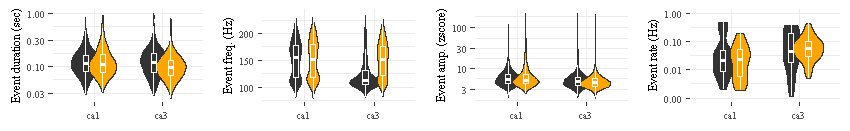

In [149]:
width_height <- set_size('thesis', 1.2, c(1,4)) 

options(repr.plot.width = width_height[1], repr.plot.height = width_height[2],units = "in")

# install.packages("ggpubr")
library(ggplot2)
# library(ggpubr)

# tex_fonts = {
# #     # Use LaTeX to write all text
# #     "text.usetex": True,
#     "font.family": "serif",
#     # Use 10pt font in plots, to match 10pt font in document
#     "axes.labelsize": 10,
#     "font.size": 10,
#     # Make the legend/label fonts a little smaller
#     "legend.fontsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8
# }

# axis.text = element_text(size = 20)

# My_Theme = theme(
#   axis.title.x = element_text(size = 16),
#   axis.text.x = element_text(size = 14),
#   axis.title.y = element_text(size = 16))

scaleFUN <- function(x) sprintf("%.2f", x)
 

# pdf("D:/ryanh/GoogleDrive/school_work/UNM/Lab/Projects/Dissertation/dissertation/inkscape_figs/ripple_section/ripple_features_v1.pdf",
#     width = width_height[1], height = width_height[2])
# par(mfrow=c(1,4))

#   theme(text=element_text(size=16,  family="Comic Sans MS"))


dodge <- position_dodge(width = 0.5)
p1 = ggplot(data=df, aes(x = area, y = ripple_duration, fill = group)) +
  geom_violin(position = dodge) +
  geom_boxplot(width=.15, outlier.colour=NA, position = dodge, color = "white") +
  theme_bw() +
  theme(panel.border = element_blank(),text = element_text(size = 7.5,family='serif'),axis.title.x = element_blank(),axis.title.y = element_text(size = 7)) +
  scale_fill_manual(values=c("grey20","orange")) +
  scale_y_continuous(labels=scaleFUN,trans='log10') +
  labs(y = "Event duration (sec)") + 
  theme(legend.position = "none")

p2 = ggplot(data=df, aes(x = area, y = peak_freq, fill = group)) +
  geom_violin(position = dodge) +
  geom_boxplot(width=.15, outlier.colour=NA, position = dodge, color = "white") +
  theme_bw() +
  theme(panel.border = element_blank(),text = element_text(size = 7.5,family='serif'),axis.title.x = element_blank(),axis.title.y = element_text(size = 7)) +
  scale_fill_manual(values=c("grey20","orange")) +
#   scale_y_continuous(labels=scaleFUN) +
  labs(y = "Event freq. (Hz)") + 
  theme(legend.position = "none")

p3 = ggplot(data=df, aes(x = area, y = peak_amplitude, fill = group)) +
  geom_violin(position = dodge) +
  geom_boxplot(width=.15, outlier.colour=NA, position = dodge, color = "white") +
  theme_bw() +
  theme(panel.border = element_blank(),text = element_text(size = 7.5,family='serif'),axis.title.x = element_blank(),axis.title.y = element_text(size = 7)) +
  scale_fill_manual(values=c("grey20","orange")) +
  scale_y_continuous(trans='log10') +
  labs(y = "Event amp. (zscore)") + 
  theme(legend.position = "none")

p4 = ggplot(data=df_ripple_rate, aes(x = area, y = ripple_rate, fill = group)) +
  geom_violin(position = dodge) +
  geom_boxplot(width=.15, outlier.colour=NA, position = dodge, color = "white") +
  theme_bw() +
  theme(panel.border = element_blank(),text = element_text(size = 7.5,family='serif'),axis.title.x=element_blank(),axis.title.y=element_text(size = 7)) +
  scale_fill_manual(values=c("grey20","orange")) +
  scale_y_continuous(labels=scaleFUN,trans='log10',limits = c(0.001, 1)) +
  labs(y = "Event rate (Hz)") + 
  theme(legend.position = "none")

# dev.off()
# p5 = plot_grid(p1, p2, p3, p4, ncol = 4, nrow = 1)
# p5
# ,ylim(0, NA)
#   scale_y_continuous(limits = c(0, 50))
# ,limits = c(0.001, 1)
p6 = grid.arrange(
  p1,
  p2,
  p3,
  p4,
  nrow = 1)

In [154]:
width_height <- set_size('thesis', 1.2, c(1,4)) 

# options(repr.plot.width = width_height[1], repr.plot.height = width_height[2],units = "cm")
# ggsave("D:/ryanh/GoogleDrive/school_work/UNM/Lab/Projects/Dissertation/dissertation/inkscape_figs/ripple_section/ripple_features.svg",width = width_height[1], height = width_height[2], units = "cm")
ggsave("D:/ryanh/GoogleDrive/school_work/UNM/Lab/Projects/Dissertation/dissertation/inkscape_figs/ripple_section/ripple_features.svg",
       plot=p6,width = width_height[1], height = width_height[2],units = "in",dpi = 600,scale = 1,limitsize = FALSE,device='svg')